In [4]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Text(0, 0.5, '#Samples')

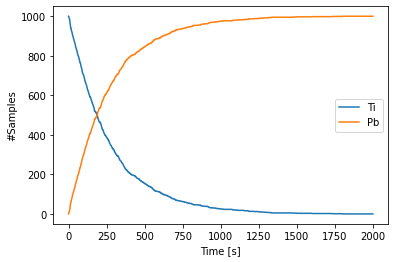

In [45]:
n=1000 # 1000 atoms
interval=2000 # range of the seconds 
Ti_curr=np.ones(n)
Pb_curr=np.zeros(n)
Ti_time=np.empty(interval)
Pb_time=np.empty(interval)
Ti_time[0]=np.sum(Ti_curr)
Pb_time[0]=np.sum(Pb_curr)
tau=3.052*60 # half-life in seconds

for t in range (1,interval):
    for i in range(n):
        if (np.random.uniform()<=1.-2**(-1/tau)): # each time step computed separately
            Ti_curr[i]=0
            Pb_curr[i]=1
    Ti_time[t]=np.sum(Ti_curr)
    Pb_time[t]=np.sum(Pb_curr)
    
plt.plot(Ti_time,label='Ti')
plt.plot(Pb_time,label='Pb')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('#Samples')

Text(0, 0.5, 'Decay Time [s]')

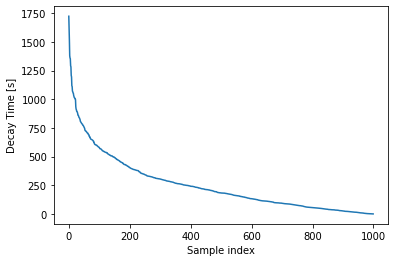

In [47]:
n=1000 # 1000 atoms

def icdf(p, mu=np.log(2)/tau):
    return -np.log(1-p)/mu

decay_t = icdf(np.random.random(n))

plt.plot(np.sort(decay_t)[::-1])
plt.xlabel('Sample index')
plt.ylabel('Decay Time [s]')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The result with hit/miss method is: 1.347782
The error is:  0.0008719999999999839


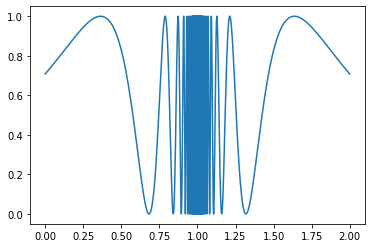

In [50]:
# HIT/MISS METHOD
correct=1.34691 # correct result of the integral

def f(x):
    return (np.sin(1/(1-x)))**2

x=np.linspace(0.00001,1.99999,100000)
plt.plot(x,f(x))

N=1000000
count=0
for i in range(N):
    x=2*np.random.random() # we want a random number in [0,2], so we multiply by 2
    y=np.random.random()
    if y<f(x): count+=1
        
A=2*1 #area of the box
I=A*count/N
print('The result with hit/miss method is:', I)
print("The error is: ", np.abs(I-correct))

In [51]:
# MIN VALUE METHOD
correct=1.34691 # correct result of the integral
def f(x):
    return (np.sin(1/(1-x)))**2

N=1000000
x=2*np.random.random(N) # we want a random number in [0,2], so we multiply by 2
I=2/N*np.sum(f(x))
print('The result with mean value method is:', I)
print("The error is: ", np.abs(I-correct))

The result with mean value method is: 1.345973778066551
The error is:  0.0009362219334489996


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [55]:
# 2D
correct=np.pi # correct result of the integral
N=1000000
count=0

for i in range(N): 
    x=2*np.random.random()-1 # from -1 to 1 random
    y=2*np.random.random()-1 # from -1 to 1 random
    if x**2+y**2<=1:
        count+=1
        
A=(2**2)*1 #area of the box
I=A*count/N
print('The result is:', I)
print("The error is: ", np.abs(I-correct))

The result is: 3.139828
The error is:  0.0017646535897930526


In [56]:
# 10D
correct=np.pi**5/(120)  # correct result of the integral
N=1000000
count=0

for i in range(N):
    x=2*np.random.rand(10)-1 # 10 random values from -1 to 1
    r=(x**2).sum()
    if r<=1:
        count+=1
        
A=(2**10)*1 #area of the box 
I=A*count/N
print('The result is:', I)
print("The error is: ", np.abs(I-correct))

The result is: 2.603008
The error is:  0.05284396012265491


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [54]:
correct=0.83893
N=1000000

def f(x):
    return x**(-1/2)/(np.exp(x)+1)

def w(x):
    return x**(-1/2)

x=np.random.random(N)**2
V=2
I=1/N*np.sum(f(x)/w(x))*V

print('Result with importance sampling method:', I)
print("The error is: ", np.abs(I-correct))

Result with importance sampling method: 0.8389594012803993
The error is:  2.9401280399299345e-05
